Sales Summary:
   product  total_qty  revenue
0   Apples         15      7.5
1  Bananas         30      9.0
2  Oranges         25     15.0


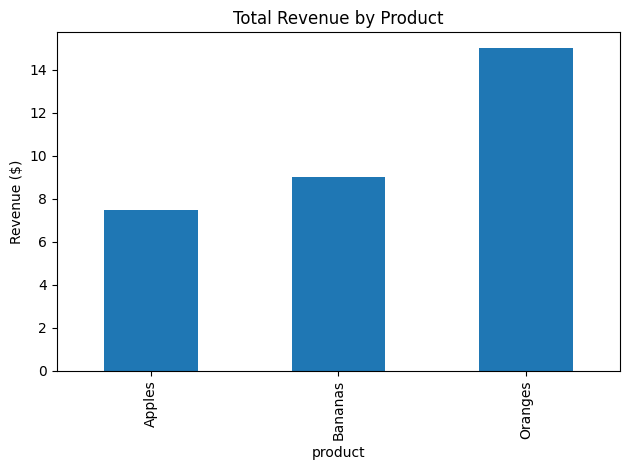

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os

# Step 1: Create and connect to the database
db_file = "sales_data.db"
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# Step 2: Create a simple sales table (if not already created)
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Step 3: Insert sample data (only if table is empty)
cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    sample_data = [
        ('Apples', 10, 0.50),
        ('Bananas', 20, 0.30),
        ('Oranges', 15, 0.60),
        ('Apples', 5, 0.50),
        ('Bananas', 10, 0.30),
        ('Oranges', 10, 0.60)
    ]
    cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
    conn.commit()

# Step 4: Run SQL query to get summary
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

# Step 5: Print results
print("Sales Summary:")
print(df)

# Step 6: Plot bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Total Revenue by Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

# Step 7: Close connection
conn.close()
